<a href="https://colab.research.google.com/github/saksham-v25/ML/blob/main/Forecast_The_Weather_Using_Prophet_For_Time_Series_Prediction/Forecast_The_Weather_Using_Prophet_For_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
! pip install pandas prophet scikit-learn plotly

In [48]:
import pandas as pd

In [49]:
import numpy as np

In [50]:
weather = pd.read_csv('weather.csv',index_col="DATE")

In [51]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",20.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",90.0,100.0,NaN,NaN,NaN,0.05,0.4,0.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",20.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,14.76,NaN,NaN,0.09,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.97,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,11.18,NaN,NaN,0.43,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [53]:
null_pct

,0
STATION,0.000000
NAME,0.000000
ACMH,0.502175
ACSH,0.502149
AWND,0.264834
FMTM,0.475769
PGTM,0.349643
PRCP,0.000000
SNOW,0.000000
SNWD,0.000026


In [54]:
valid_columns = weather.columns[null_pct < 0.05]

In [55]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [56]:
weather=weather[valid_columns].copy()

In [57]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33


In [58]:
weather.columns = weather.columns.str.lower()

In [59]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33


In [60]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12',
       '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17'],
      dtype='object', name='DATE', length=38628)

In [61]:
weather.index = pd.to_datetime(weather.index)

In [62]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17'],
              dtype='datetime64[ns]', name='DATE', length=38628, freq=None)

In [63]:
weather["station"].unique()

array(['USW00014732', 'USW00094789'], dtype=object)

In [64]:
lga = weather[weather["station"] == "USW00014732"].copy()
weather = weather[weather["station"] == "USW00094789"].copy()

In [65]:
weather = weather.merge(lga, left_index=True, right_index=True)

In [66]:
weather

,station_x,name_x,prcp_x,snow_x,snwd_x,tmax_x,tmin_x,station_y,name_y,prcp_y,snow_y,snwd_y,tmax_y,tmin_y
DATE,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,62,43
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,46,38
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,USW00014732,"LAGUARDIA AIRPORT, NY US",0.49,0.0,0.0,48,36


In [67]:
# Setup time series for prophet
weather["y"] = weather.shift(-1)["tmax_x"]
weather = weather.ffill()


In [68]:
weather["ds"] = weather.index

In [69]:
weather.shape

(19314, 16)

In [70]:
predictors = weather.columns[~weather.columns.isin(["y", "name_x", "station_x", "name_y", "station_y", "ds"])]

In [71]:
train = weather[:"2021-12-31"]
test = weather["2021-12-31":]

In [72]:
# Fit initial prophet model
from prophet import Prophet

def fit_prophet(train):
    m = Prophet()
    for p in predictors:
        m.add_regressor(p)
    m.fit(train)
    return m

m = fit_prophet(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdr3dahm/r5tjyirn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdr3dahm/hfpo7guv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48900', 'data', 'file=/tmp/tmpmdr3dahm/r5tjyirn.json', 'init=/tmp/tmpmdr3dahm/hfpo7guv.json', 'output', 'file=/tmp/tmpmdr3dahm/prophet_modeljllg8x_3/prophet_model-20251020130406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:

predictions = m.predict(test)

In [74]:

predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-31,61.463828,43.205272,58.438526,61.463828,61.463828,-10.169947,-10.169947,-10.169947,-2.402831,...,0.024398,0.024398,0.024398,-7.791514,-7.791514,-7.791514,0.0,0.0,0.0,51.293881
1,2022-01-01,61.463609,44.281512,58.978851,61.463609,61.463609,-9.471490,-9.471490,-9.471490,-1.620814,...,-0.016342,-0.016342,-0.016342,-7.834333,-7.834333,-7.834333,0.0,0.0,0.0,51.992120
2,2022-01-02,61.463390,42.041546,57.007043,61.463390,61.463390,-11.883881,-11.883881,-11.883881,-4.101170,...,0.092372,0.092372,0.092372,-7.875082,-7.875082,-7.875082,0.0,0.0,0.0,49.579510
3,2022-01-03,61.463171,30.819008,46.355778,61.463171,61.463171,-22.891411,-22.891411,-22.891411,-15.305467,...,0.327850,0.327850,0.327850,-7.913794,-7.913794,-7.913794,0.0,0.0,0.0,38.571760
4,2022-01-04,61.462952,27.964539,43.994074,61.462952,61.462952,-25.296214,-25.296214,-25.296214,-17.252888,...,-0.092836,-0.092836,-0.092836,-7.950490,-7.950490,-7.950490,0.0,0.0,0.0,36.166738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2022-11-13,61.394386,48.611334,64.207666,61.381864,61.406926,-5.039727,-5.039727,-5.039727,-2.145539,...,0.092372,0.092372,0.092372,-2.986560,-2.986560,-2.986560,0.0,0.0,0.0,56.354659
318,2022-11-14,61.394166,42.387756,57.480511,61.381581,61.406787,-11.142234,-11.142234,-11.142234,-8.345683,...,0.327850,0.327850,0.327850,-3.124400,-3.124400,-3.124400,0.0,0.0,0.0,50.251933
319,2022-11-15,61.393947,41.591330,57.147420,61.381298,61.406918,-12.076547,-12.076547,-12.076547,-8.722119,...,-0.092836,-0.092836,-0.092836,-3.261591,-3.261591,-3.261591,0.0,0.0,0.0,49.317401
320,2022-11-16,61.393728,43.315657,58.223019,61.381015,61.407054,-10.707723,-10.707723,-10.707723,-7.047499,...,-0.262173,-0.262173,-0.262173,-3.398051,-3.398051,-3.398051,0.0,0.0,0.0,50.686006


In [46]:
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric

plot_components_plotly(m, predictions)

/usr/local/lib/python3.12/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [75]:
from prophet.utilities import regressor_coefficients

regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,prcp_x,additive,0.118130,-0.195110,-0.195110,-0.195110
1,snow_x,additive,0.064540,-0.012009,-0.012009,-0.012009
2,snwd_x,additive,0.209635,0.062820,0.062820,0.062820
3,tmax_x,additive,61.758648,0.012017,0.012017,0.012017
4,tmin_x,additive,47.494024,-0.084570,-0.084570,-0.084570
5,prcp_y,additive,0.123378,-0.321223,-0.321223,-0.321223
6,snow_y,additive,0.071347,-0.491430,-0.491430,-0.491430
7,snwd_y,additive,0.217759,-0.201091,-0.201091,-0.201091
8,tmax_y,additive,62.609277,0.281772,0.281772,0.281772
9,tmin_y,additive,48.923130,0.427903,0.427903,0.427903


In [76]:
predictions.index = test.index
predictions["actual"] = test["y"]

In [77]:
def mse(predictions, actual_label="actual", pred_label="yhat"):
    se = ((predictions[actual_label] - predictions[pred_label]) ** 2)
    print(se.mean())

mse(predictions)

40.5099948791936


In [78]:
# Cross validate across data set
from prophet.diagnostics import cross_validation, performance_metrics


m = fit_prophet(weather)
cv = cross_validation(m, initial=f'{365 * 5} days', period='180 days', horizon = '180 days', parallel="processes")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdr3dahm/m7ylb1c7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdr3dahm/5ghuhzkk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91127', 'data', 'file=/tmp/tmpmdr3dahm/m7ylb1c7.json', 'init=/tmp/tmpmdr3dahm/5ghuhzkk.json', 'output', 'file=/tmp/tmpmdr3dahm/prophet_modelkt9cdtni/prophet_model-20251020130427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 97 forecasts with cutoffs between 1975-01-28 00:00:00 and 2022-05-21 00:00:00
INFO:prophet:Applying in parallel with <conc

In [79]:
mse(cv, actual_label="y")

36.191298932960194


<Axes: >

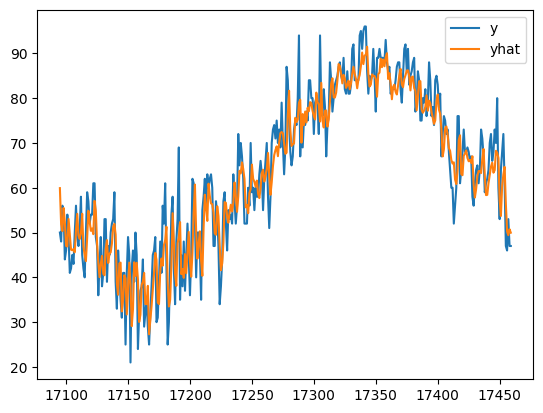

In [80]:
cv[["y", "yhat"]][-365:].plot()

In [81]:
# Predict one day ahead with high accuracy
m = fit_prophet(weather)
m.predict(weather.iloc[-1:])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdr3dahm/adax07pp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdr3dahm/36ye8l_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54863', 'data', 'file=/tmp/tmpmdr3dahm/adax07pp.json', 'init=/tmp/tmpmdr3dahm/36ye8l_1.json', 'output', 'file=/tmp/tmpmdr3dahm/prophet_modelzcvc3iq6/prophet_model-20251020131348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-17,61.670445,42.12099,58.129636,61.670445,61.670445,-11.531197,-11.531197,-11.531197,-7.904678,...,-0.065228,-0.065228,-0.065228,-3.561291,-3.561291,-3.561291,0.0,0.0,0.0,50.139248


In [82]:
# Predict multiple days ahead with lower accuracy
m = Prophet()
m.fit(weather)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdr3dahm/2h1wikz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdr3dahm/p6wvhqi_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21246', 'data', 'file=/tmp/tmpmdr3dahm/2h1wikz4.json', 'init=/tmp/tmpmdr3dahm/p6wvhqi_.json', 'output', 'file=/tmp/tmpmdr3dahm/prophet_modelxovf05up/prophet_model-20251020131405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
from prophet.plot import plot_plotly

plot_plotly(m, forecast)